In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('1905-ML_Game1_data.csv', header=None)

In [3]:
size = len(df)
print(size)

7714


In [4]:
ds = pd.date_range(end='5/10/2019 10:00:00', periods=size, freq='15min')
ds

DatetimeIndex(['2019-02-19 01:45:00', '2019-02-19 02:00:00',
               '2019-02-19 02:15:00', '2019-02-19 02:30:00',
               '2019-02-19 02:45:00', '2019-02-19 03:00:00',
               '2019-02-19 03:15:00', '2019-02-19 03:30:00',
               '2019-02-19 03:45:00', '2019-02-19 04:00:00',
               ...
               '2019-05-10 07:45:00', '2019-05-10 08:00:00',
               '2019-05-10 08:15:00', '2019-05-10 08:30:00',
               '2019-05-10 08:45:00', '2019-05-10 09:00:00',
               '2019-05-10 09:15:00', '2019-05-10 09:30:00',
               '2019-05-10 09:45:00', '2019-05-10 10:00:00'],
              dtype='datetime64[ns]', length=7714, freq='15T')

In [5]:
df = df.rename(columns={0:'y'})

In [7]:
df['ds'] = ds

In [9]:
df['y'] = (df['y'] - df['y'].mean()) / (df['y'].std())
df.tail()

,y,ds
7709,-1.015114,2019-05-10 09:00:00
7710,-0.917180,2019-05-10 09:15:00
7711,-0.998806,2019-05-10 09:30:00
7712,-0.914377,2019-05-10 09:45:00
7713,-0.870718,2019-05-10 10:00:00


In [24]:
from fbprophet import Prophet
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=200, freq='15min')
future.tail()

C:\program\anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
C:\program\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds
7909,2019-05-12 11:00:00
7910,2019-05-12 11:15:00
7911,2019-05-12 11:30:00
7912,2019-05-12 11:45:00
7913,2019-05-12 12:00:00


In [25]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7909,2019-05-12 11:00:00,22053.106151,9647.644067,35193.311934
7910,2019-05-12 11:15:00,22549.421173,9429.877343,34951.585136
7911,2019-05-12 11:30:00,23042.544168,9680.002699,36330.440915
7912,2019-05-12 11:45:00,23524.771233,11163.895436,36913.430270
7913,2019-05-12 12:00:00,23988.122209,9320.401757,36484.002059


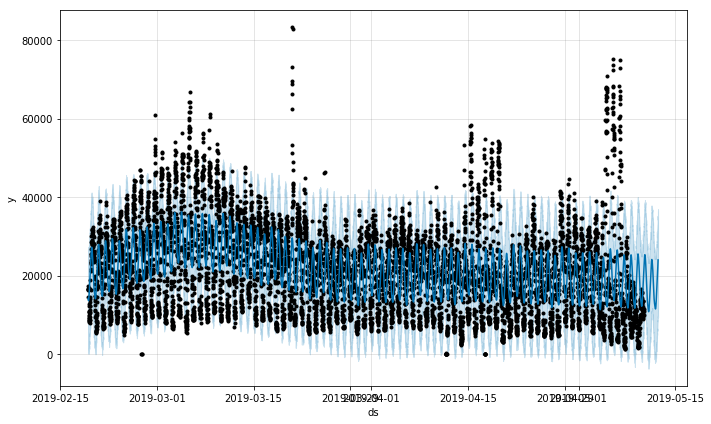

In [26]:
fig1 = m.plot(forecast)

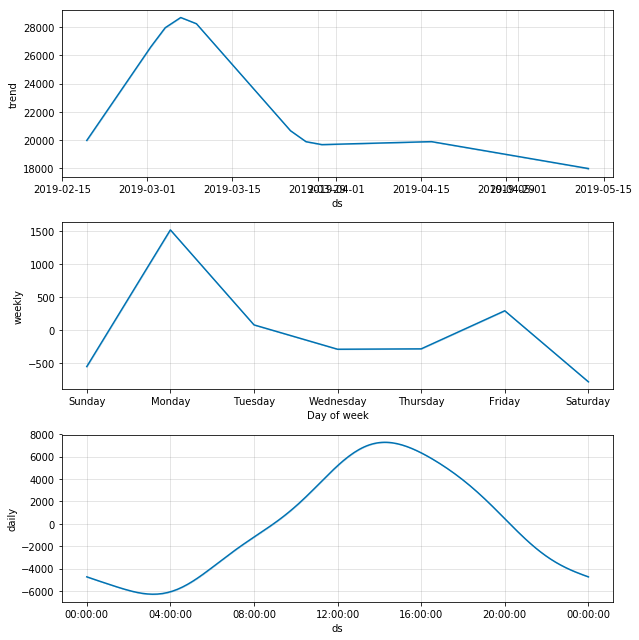

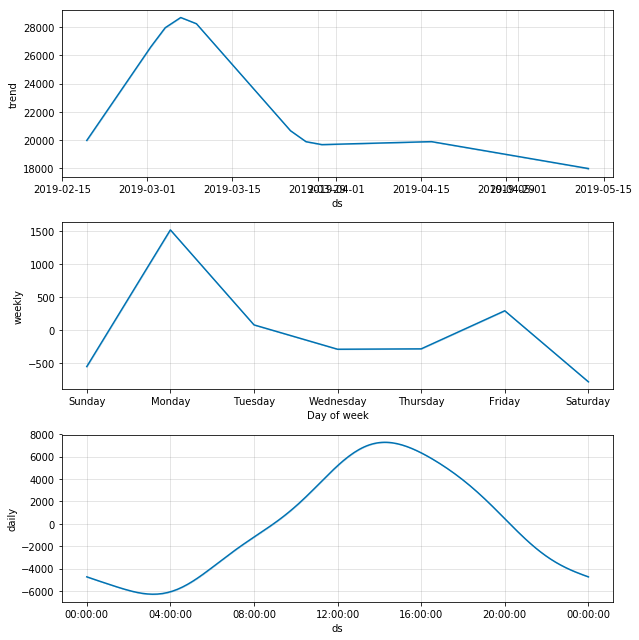

In [27]:
m.plot_components(forecast)

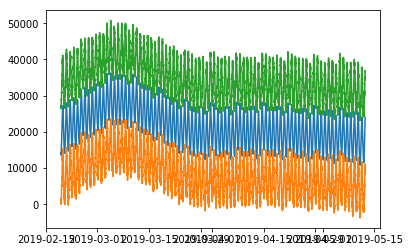

In [28]:
x1 = forecast['ds']
y1 = forecast['yhat']
y2 = forecast['yhat_lower']
y3 = forecast['yhat_upper']
plt.plot(x1,y1)
plt.plot(x1,y2)
plt.plot(x1,y3)
plt.show()